# An "easy" and an "hard" instance for the `ialg` algorithm

While conducting our experimentes, we found two instances having a significant difference in the number of iterations required to execute the `ialg' algorithm . The first instance is the "easy" instance, which is the instance that requires the least number of iterations to solve the problem. The second instance is the "hard" instance, which is the instance that requires the most number of iterations to solve the problem. On the computer we used for the experiments, the second instances makes the algorithm run out of memory.

First, we import the packages we need as well as the function we need from `utils.py`

In [1]:
from utils import ialg
import numpy as np
import networkx as nx
from scipy.spatial.distance import cdist
import time
import matplotlib.pyplot as plt 

While running our experiments, we found by chance the seed leading to the easy and the hard instance

In [2]:
# Set the number of nodes
n = 25
seed_easy = 0
seed_hard = 1

## Easy instance

In [3]:
np.random.seed(n * seed_easy) # To ensure reproducibility
# Sample n points in the unit square
X = np.random.uniform(0, 1, (n, 2))
# Compute the euclidean distance matrix
D = cdist(X, X, 'euclidean')

Plot the distribution of the points

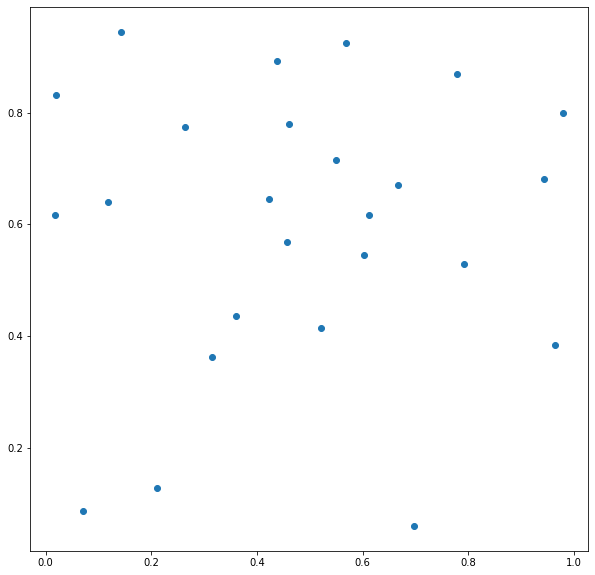

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
# Create a graph and assign weight
G = nx.Graph()
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(i, j, cost=round(1000*D[i, j])) 

In [6]:
start = time.time()
S_family, S_num = ialg(G, verbose=True)
print("Time taken for easy instance: ", time.time() - start)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-18
num_bb_nodes, num_subtour_constrs, num_conn_comp = 1 0 3
num_bb_nodes, num_subtour_constrs, num_conn_comp = 2 1 2
Found a solution with this many subtours: 1
Specifically, they are:
[8, 12, 13, 15, 17]
S_family =  [[8, 12, 13, 15, 17]]
Time taken for easy instance:  0.030076026916503906


## Hard instance

In [7]:
np.random.seed(n * seed_hard) # To ensure reproducibility
# Sample n points in the unit square
X = np.random.uniform(0, 1, (n, 2))
# Compute the euclidean distance matrix
D = cdist(X, X, 'euclidean')

Even in this case, we plot the distribution of the points to assess some differences

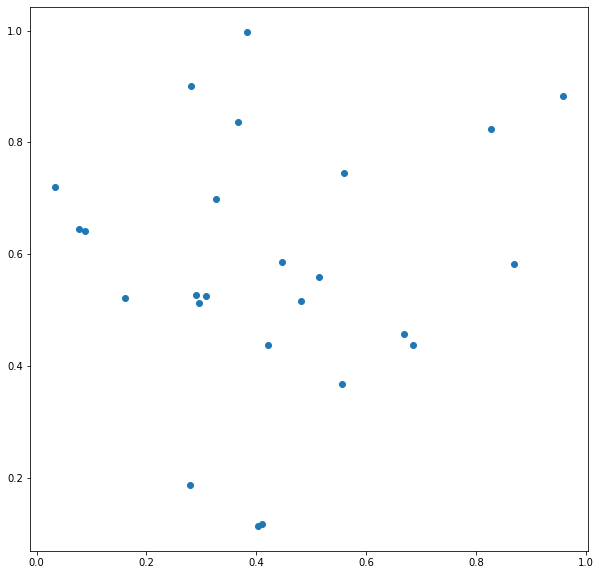

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [10]:
# Create a graph and assign weight
G = nx.Graph()
for i in range(n):
    for j in range(i + 1, n):
        G.add_edge(i, j, cost=round(1000*D[i, j])) 

We run the `ialg` algorithm on the hard instance, we interrupt it manually after a while, as it runs OOM.

In [11]:
start = time.time()
S_family, S_num = ialg(G, verbose=True)
print("Time taken for hard instance: ", time.time() - start)

num_bb_nodes, num_subtour_constrs, num_conn_comp = 1 0 7
num_bb_nodes, num_subtour_constrs, num_conn_comp = 2 1 5
num_bb_nodes, num_subtour_constrs, num_conn_comp = 4 1 7
num_bb_nodes, num_subtour_constrs, num_conn_comp = 8 1 7
num_bb_nodes, num_subtour_constrs, num_conn_comp = 16 1 7
num_bb_nodes, num_subtour_constrs, num_conn_comp = 32 1 7
num_bb_nodes, num_subtour_constrs, num_conn_comp = 64 1 6
num_bb_nodes, num_subtour_constrs, num_conn_comp = 128 2 7
num_bb_nodes, num_subtour_constrs, num_conn_comp = 256 2 5
num_bb_nodes, num_subtour_constrs, num_conn_comp = 512 2 5
num_bb_nodes, num_subtour_constrs, num_conn_comp = 1024 2 5
num_bb_nodes, num_subtour_constrs, num_conn_comp = 2048 2 5


KeyboardInterrupt: 